In [26]:
# Import necessary libraries
from prophet import Prophet
import pandas as pd
from prophet import Prophet

# Load your dataset (assuming you have already loaded the CSV file)
df = pd.read_csv("C:/Users/Admin/Desktop/Final Exam prep/demand_forecasting_data.csv")
df.head()

,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917


In [27]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') 
df.head()


,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917


In [28]:
# Assuming you want to filter by a specific product category
category_filter = 'P002'  # Adjust this if necessary

# Filter the DataFrame by the specified Product_ID
frame = df[df['Product_ID'] == category_filter]

# Display only 'Date' and 'Price' columns
frame = frame[['Date', 'Price']]

# Convert 'Date' column to datetime format (adjust format as necessary)
frame['Date'] = pd.to_datetime(frame['Date'], format='%Y-%m-%d')

# Rename columns to fit Prophet's requirements: 'ds' for dates and 'y' for the target variable (Price)
frame.columns = ['ds', 'y']

# Convert 'y' (Price) to numeric values, coercing errors to NaN (to handle any non-numeric entries)
frame['y'] = pd.to_numeric(frame['y'], errors='coerce')

# Drop rows where either 'ds' or 'y' contain NaN values
frame = frame.dropna(subset=['ds', 'y'])

# Display the first few rows of the prepared DataFrame
print(frame)

              ds          y
0     2019-01-01  73.496059
5     2019-01-01  81.460038
12    2019-01-01  44.752527
20    2019-01-01  91.088278
28    2019-01-02  40.961099
...          ...        ...
34976 2021-12-31  60.977738
34978 2021-12-31  49.854662
34984 2021-12-31  59.479335
34986 2021-12-31  72.150363
34989 2021-12-31  88.600547

[7010 rows x 2 columns]


In [29]:
# Create and fit the Prophet model
model = Prophet()

# Fit the model using the prepared 'frame' DataFrame
model.fit(frame)


23:43:30 - cmdstanpy - INFO - Chain [1] start processing
23:43:31 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Define the future period for which you want to predict (e.g., 365 days into the future)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Display the forecasted data (date, predicted price, lower and upper bounds)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds       yhat  yhat_lower  yhat_upper
0    2019-01-01  64.315970   39.318131   89.669982
1    2019-01-02  63.816387   36.086935   90.322715
2    2019-01-03  63.866125   38.017605   91.036658
3    2019-01-04  63.878131   37.962570   89.271288
4    2019-01-05  64.040597   38.822243   91.816936
...         ...        ...         ...         ...
1455 2022-12-27  65.296499   38.785506   89.752953
1456 2022-12-28  64.717872   39.764639   88.070068
1457 2022-12-29  64.683652   39.131426   90.254617
1458 2022-12-30  64.609536   37.257686   88.703248
1459 2022-12-31  64.686435   38.610065   89.872499

[1460 rows x 4 columns]


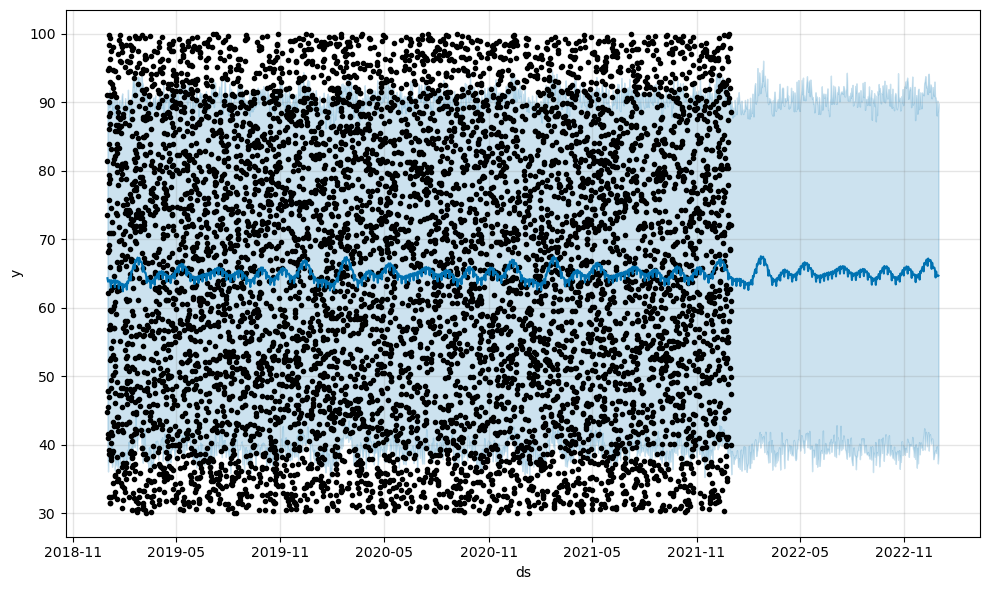

In [33]:
# Plot the forecast using Prophet's built-in plotting method
plot1 = model.plot(forecast)

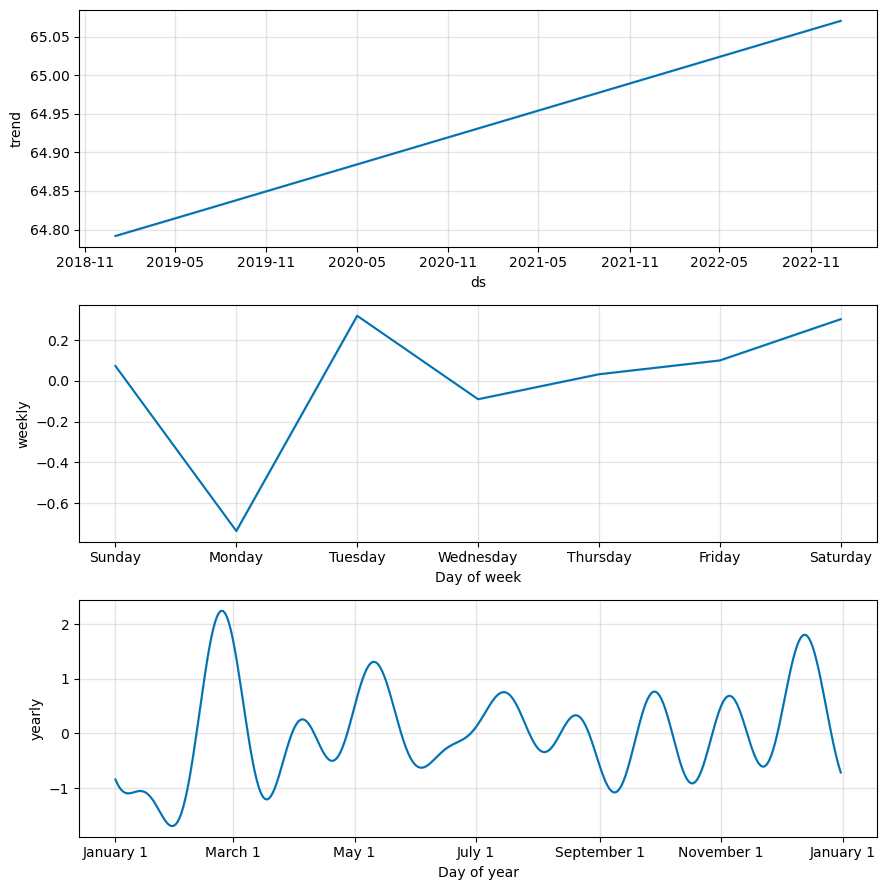

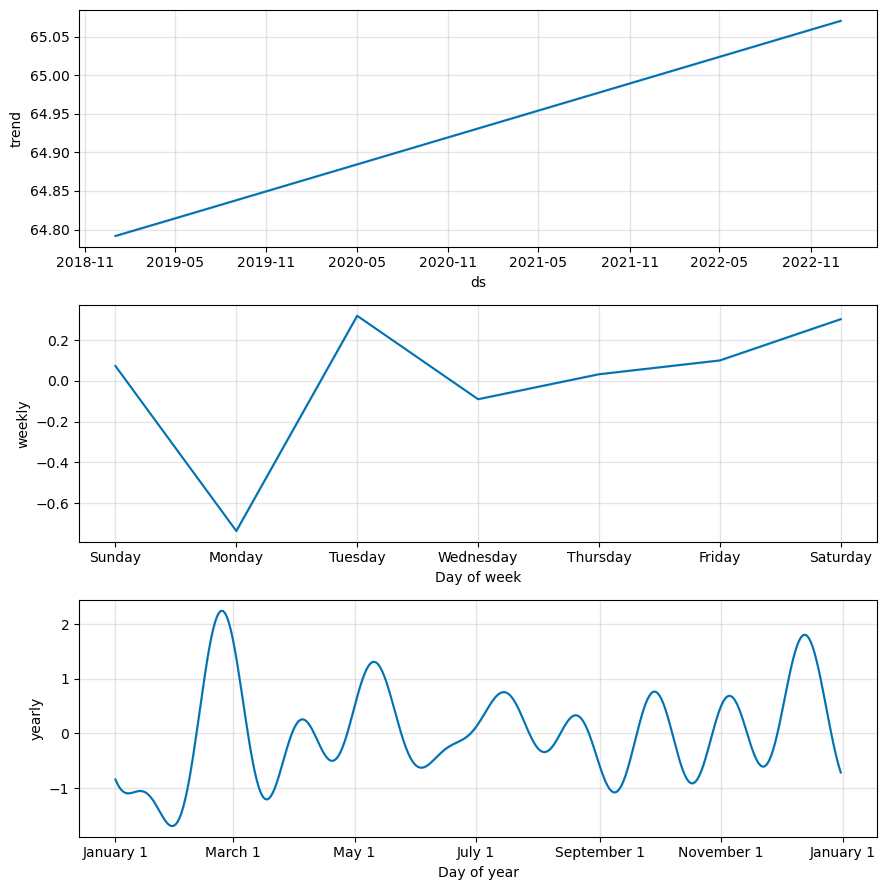

In [35]:
# Optionally, plot the forecast components (trend, weekly, yearly seasonality, etc.)
model.plot_components(forecast)
